In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# Question 1

<Axes: xlabel='x'>

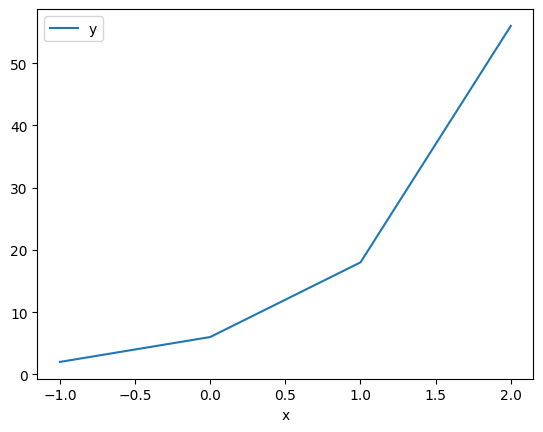

In [ ]:
# original function
object_function = lambda x: 3*x**3+4*x**2+5*x+6

x = np.array([-1, 0, 1, 2])
y = object_function(x)
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y')

In [ ]:
def gradient_descent(x, y, a, b, c, d, learning_rate, iterations):

  N = len(x)
  # track mse
  errors = []
  for i in range(iterations):
      # compute y_pred = a*x^3 + b*x^2 + c*x + d
      y_pred = a * x**3 + b * x**2 + c * x + d
      error = (1/N) * np.sum((y_pred - y) ** 2)
      errors.append(error)

      # compute gradients
      da = (-2/N) * np.sum(x**3 * (y - y_pred))
      db = (-2/N) * np.sum(x**2 * (y - y_pred))
      dc = (-2/N) * np.sum(x * (y - y_pred))
      dd = (-2/N) * np.sum(y - y_pred)

      # update weights
      a -= learning_rate * da
      b -= learning_rate * db
      c -= learning_rate * dc
      d -= learning_rate * dd

      print(f"Iteration {i+1}: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}, error = {error:.4f}")

  return a, b, c, d, errors

In [ ]:
# iteration = 3
learning_rate = 0.01
iterations = 3
a, b, c, d = 1, 1, 1, 1
a_final, b_final, c_final, d_final, errors = gradient_descent(x, y, a, b, c, d, learning_rate, iterations)

# print final weights and mse
print("\nFinal parameters:")
print(f"a = {a_final:.4f}, b = {b_final:.4f}, c = {c_final:.4f}, d = {d_final:.4f}")

Iteration 1: a = 2.7000, b = 1.9000, c = 1.4700, d = 1.3100, error = 476.5000
Iteration 2: a = 3.6403, b = 2.4189, c = 1.7338, d = 1.5141, error = 163.0111
Iteration 3: a = 4.1554, b = 2.7240, c = 1.8823, d = 1.6583, error = 64.2167

Final parameters:
a = 4.1554, b = 2.7240, c = 1.8823, d = 1.6583


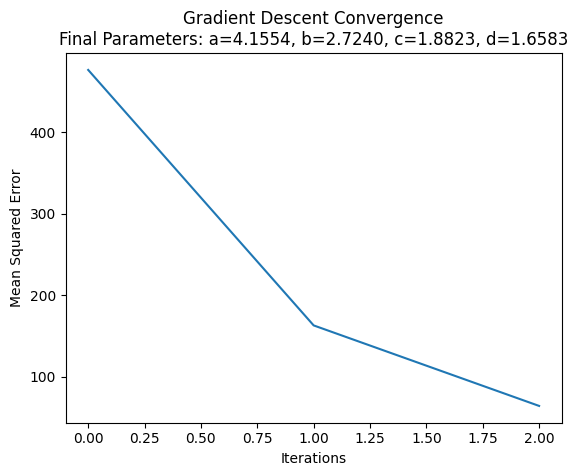

In [ ]:
# plot Gradient Descent Convergence
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Gradient Descent Convergence\nFinal Parameters: a={a_final:.4f}, b={b_final:.4f}, c={c_final:.4f}, d={d_final:.4f}')
plt.show()

# Question **3**

3.1 original data set

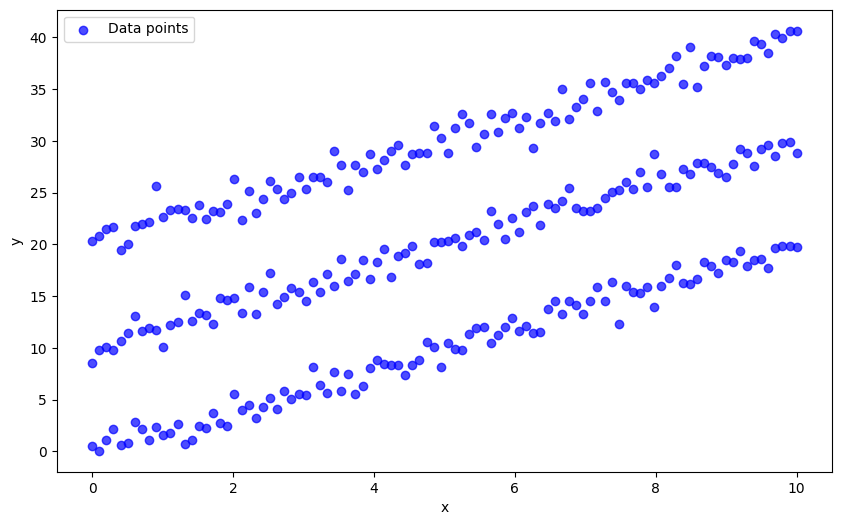

In [ ]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
# Set a random seed for reproducibility
np.random.seed(42)

# Parameters for the three parallel lines
m = 2.0         # Common slope for all lines
c1 = 0.0        # Intercept for the first line
c2 = 10.0       # Intercept for the second line
c3 = 20.0       # Intercept for the third line
n_points = 100  # Number of points per line
noise_std = 1.0 # Standard deviation of the Gaussian noise

# Generate x-values uniformly for all lines
x_vals = np.linspace(0, 10, n_points)

# Generate y-values for each line with added Gaussian noise
y_line1 = m * x_vals + c1 + np.random.normal(0, noise_std, n_points)
y_line2 = m * x_vals + c2 + np.random.normal(0, noise_std, n_points)
y_line3 = m * x_vals + c3 + np.random.normal(0, noise_std, n_points)

# Combine the points from all three lines into one dataset
X = np.concatenate([x_vals, x_vals, x_vals]).reshape(-1, 1)
y = np.concatenate([y_line1, y_line2, y_line3])

# Optionally, shuffle the dataset so that the points from the three lines are intermingled
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3.2 make the linear regression model learn one of the streaks
(the choice of which one to learn is yours to make) and treat the other two lines as outliers

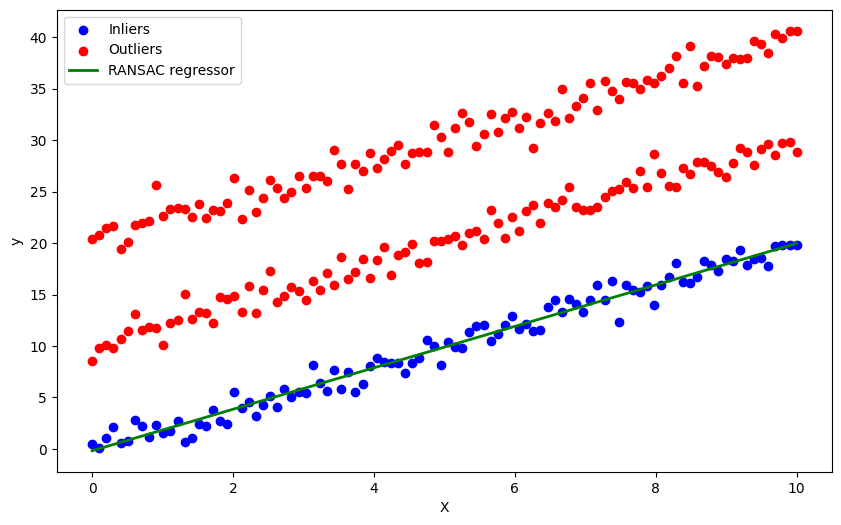

In [ ]:
# Create and fit the RANSAC regressor
ransac = RANSACRegressor(estimator=LinearRegression(),
                         residual_threshold=3,
                         random_state=42)
ransac.fit(X, y)

# Predict values for plotting
line_X = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

# Identify inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', label='Outliers')
plt.plot(line_X, line_y_ransac, color='green', linewidth=2, label='RANSAC regressor')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

3.3 train each line separately to see the errors

In [ ]:
#############################################################
# train line 1 and compute errors, find max error and min error
#############################################################
x_train = np.concatenate([x_vals]).reshape(-1, 1)
y_train_1 = y_line1
model_1 = LinearRegression()
model_1.fit(x_train, y_train_1)

y_pred_1 = model_1.predict(x_train)
errors_1 = abs(y_train_1 - y_pred_1)
mse_1 = sum((y_train_1 - y_pred_1)**2)/100
print(f"Line 1: the max error is {max(errors_1):0.2f}, the MSE is {mse_1:0.2f}")

Line 1: the max error is 2.55, the MSE is 0.81


In [ ]:
#############################################################
# train line 2 and compute errors, find max error and min error
#############################################################
y_train_2 = y_line2
model_2 = LinearRegression()
model_2.fit(x_train, y_train_2)

y_pred_2 = model_2.predict(x_train)
errors_2 = abs(y_train_2 - y_pred_2)
mse_2 = sum((y_train_2 - y_pred_2)**2)/100
print(f"Line 2: the max error is {max(errors_2):0.2f}, the MSE is {mse_2:0.2f}")

Line 2: the max error is 2.69, the MSE is 0.90


In [ ]:
#############################################################
# train line 3 and compute errors, find max error and min error
#############################################################
y_train_3 = y_line3
model_3 = LinearRegression()
model_3.fit(x_train, y_train_3)

y_pred_3 = model_3.predict(x_train)
errors_3 = abs(y_train_3 - y_pred_3)
mse_3 = sum((y_train_3 - y_pred_3)**2)/100
print(f"Line 3: the max error is {max(errors_3):0.2f}, the MSE is {mse_3:0.2f}")

Line 3: the max error is 3.65, the MSE is 1.15


# Question 4

4.1 original date set

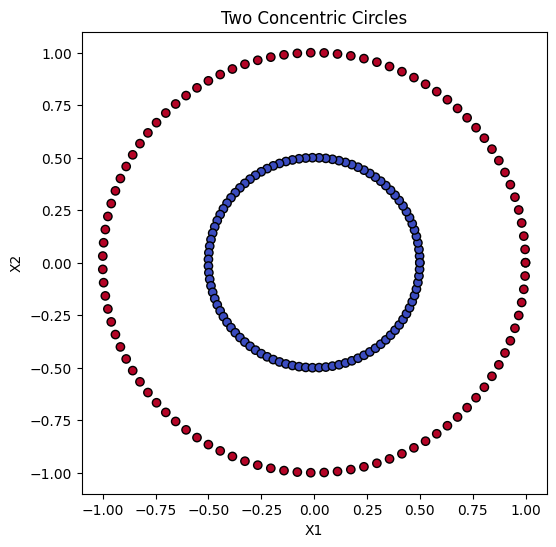

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Generate synthetic data: Two concentric circles
np.random.seed(42)
n_samples = 200

# Inner circle (class 0)
theta_inner = np.linspace(0, 2 * np.pi, n_samples // 2)
X_inner = np.c_[np.cos(theta_inner), np.sin(theta_inner)] * 0.5
y_inner = np.zeros(n_samples // 2)

# Outer circle (class 1)
theta_outer = np.linspace(0, 2 * np.pi, n_samples // 2)
X_outer = np.c_[np.cos(theta_outer), np.sin(theta_outer)] * 1.0
y_outer = np.ones(n_samples // 2)

# Combine the datasets
X = np.vstack([X_inner, X_outer])
y = np.hstack([y_inner, y_outer])

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Two Concentric Circles")
plt.show()

4.2 split data to training and test to see performance

In [ ]:
# split data to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}")

Accuracy: 0.375, Precision: 0.375, Recall: 0.47368421052631576, F1: 0.4186046511627907


4.3 do transformation on features to generate new model and see the performance

In [ ]:
# add a new feature - distance from the (0, 0)
d = np.sqrt(X[:, 0]**2 + X[:, 1]**2).reshape(-1, 1)

# add the new feature to X
X_transformed = np.hstack((X, d))
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

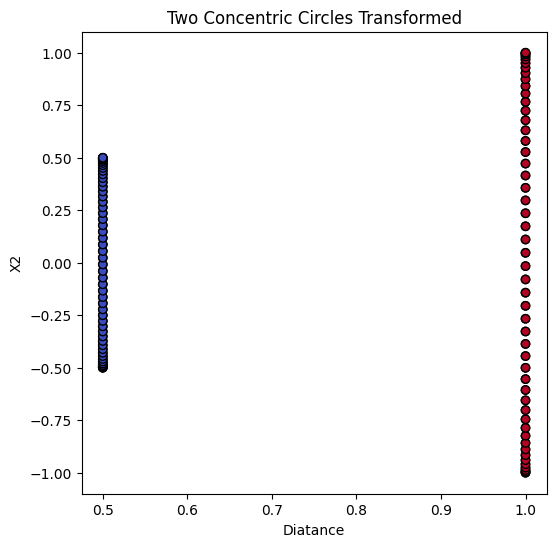

In [ ]:
# Plot the added features
plt.figure(figsize=(6, 6))
plt.scatter(X_transformed[:, 2], X_transformed[:, 0], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Diatance")
plt.ylabel("X2")
plt.title("Two Concentric Circles Transformed")
plt.show()

In [ ]:
# train the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}")

Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


4.4 plot ROC

Threshold: inf, TPR: 0.00, FPR: 0.00
Threshold: 0.98, TPR: 0.05, FPR: 0.00
Threshold: 0.97, TPR: 1.00, FPR: 0.00
Threshold: 0.02, TPR: 1.00, FPR: 1.00


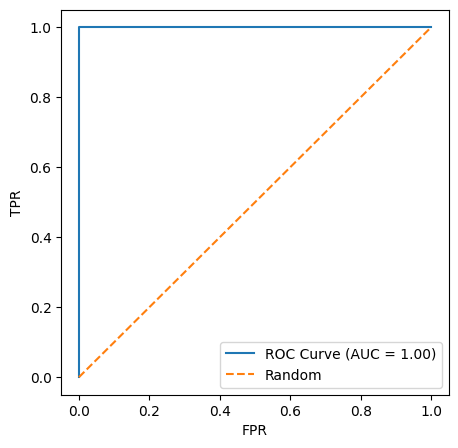

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

##############################################
# ROC Curve
##############################################
# This line gets the probability predictions of the logistic regression model for the positive class
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Case in point: the thresholds being adjusted to produce different TPR and FPR for the ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Loop through thresholds to print some of them and their corresponding TPR (or recall) and FPR
for i in range(0, len(thresholds)):
    print(f"Threshold: {thresholds[i]:.2f}, TPR: {tpr[i]:.2f}, FPR: {fpr[i]:.2f}")

# Compute area under the ROC curve (higher = better classification)
roc_auc = roc_auc_score(y_test, y_pred_proba)

axs.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
axs.plot([0, 1], [0, 1], linestyle="--", label="Random")
axs.set_xlabel("FPR")
axs.set_ylabel("TPR")
axs.legend()

# Question 5

5.1 input data set

In [ ]:
# input data set

url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"
df = pd.read_csv(url)

df


,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


In [ ]:
df_x = df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
'Absolute magnitude (Mv)']]

df_y = df['Spectral Class']



5.2 Experiment 1 and perf metrics

In [ ]:
# experiment 1
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the classifier
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train_scaled, y_train)

# Perform cross-validation, calculate accuracy rate
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=7)

y_pred = clf.predict(X_test_scaled)


acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the cross-validation results
print(f"Cross-validation scores: {cv_scores}")

# cross validation metrc
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"CV Standard Deviation: {np.std(cv_scores):.4f}")

# perf metric
print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}")



Cross-validation scores: [0.83333333 0.75       0.70833333 0.70833333 0.83333333 0.83333333
 0.79166667]
Mean cross-validation score: 0.7797619047619049
CV Standard Deviation: 0.0532
Accuracy: 0.8055555555555556, Precision: 0.7447916666666666, Recall: 0.8055555555555556, F1: 0.7727579111678727


5.3 experiment 1 coefficients

In [ ]:
# print intercepts and
for i in range(len(clf.classes_)):
  print("The class: ", clf.classes_[i])
  print("Intercept: ", clf.intercept_[i])
  print("Coefficients: ", clf.coef_[i])

The class:  A
Intercept:  1.112012674102282
Coefficients:  [ 0.32913953 -0.64280297 -0.12817429 -0.04438777]
The class:  B
Intercept:  1.2937725922814032
Coefficients:  [ 2.38944363 -0.21630489 -0.09551708  0.31134122]
The class:  F
Intercept:  0.5654760430702604
Coefficients:  [-0.0076893  -0.9065762  -0.4601507   0.34372145]
The class:  G
Intercept:  -2.347542490203805
Coefficients:  [ 0.02772258  0.09896591  0.88913078 -0.30674523]
The class:  K
Intercept:  -0.7440597696238808
Coefficients:  [-0.71640034 -0.20580135  0.39073323 -0.06741245]
The class:  M
Intercept:  0.47147441619640196
Coefficients:  [-4.26520579  0.66339322  0.35118819  1.07183121]
The class:  O
Intercept:  -0.35113346582265487
Coefficients:  [ 2.24298968  1.20912628 -0.94721013 -1.30834844]


5.4 plot experiment 1 Roc

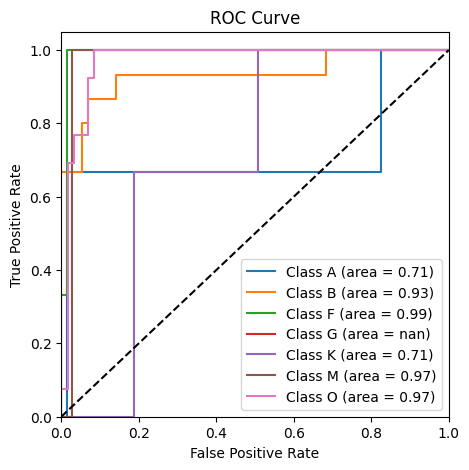

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

##############################################
# ROC Curve
##############################################
y_pred_proba = clf.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], threadholds = roc_curve(y_test == clf.classes_[i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test == clf.classes_[i], y_pred_proba[:, i])

for i in range(len(clf.classes_)):
    axs.plot(fpr[i], tpr[i], label=f'Class {clf.classes_[i]} (area = {roc_auc[i]:.2f})')

axs.plot([0, 1], [0, 1], 'k--')
axs.set_xlim([0.0, 1.0])
axs.set_ylim([0.0, 1.05])
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.set_title('ROC Curve')
axs.legend(loc="lower right")
plt.show()

5.5 experiment 1 confusion matrix

Confusion Matrix：
 [[ 1  1  0  0  0  1  0]
 [ 0 11  0  1  0  0  3]
 [ 1  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0 35  0]
 [ 1  1  0  0  0  0 11]]


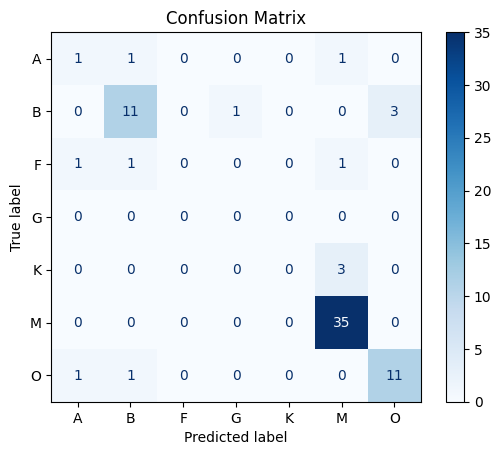

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix：\n", cm)

# plot confusion mtrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

5.6 Experiment 2 and perf metrics

In [ ]:
# experiment 2
# map y value
map = {
    'O': 'Hot stars or Blue-White Stars (O, B, A)',
    'B': 'Hot stars or Blue-White Stars (O, B, A)',
    'A': 'Hot stars or Blue-White Stars (O, B, A)',
    'F': 'Intermediate stars or Yellow Stars (F, G)',
    'G': 'Intermediate stars or Yellow Stars (F, G)',
    'K': 'Cool stars or Red-Orange Stars (K, M)',
    'M': 'Cool stars or Red-Orange Stars (K, M)',
}

df_y_2 = df_y.map(map)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_x, df_y_2, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

# Define the classifier
clf_2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf_2.fit(X_train_scaled_2, y_train_2)

# Perform cross-validation, calculate accuracy rate
cv_scores_2 = cross_val_score(clf_2, X_train_scaled_2, y_train_2, cv=7)

y_pred_2 = clf_2.predict(X_test_scaled_2)


acc_2 = accuracy_score(y_test_2, y_pred_2)
precision_2 = precision_score(y_test_2, y_pred_2, average='weighted')
recall_2 = recall_score(y_test_2, y_pred_2, average='weighted')
f1_2 = f1_score(y_test_2, y_pred_2, average='weighted')


# Output the cross-validation results
print(f"Cross-validation scores: {cv_scores_2}")

# print cross validation metrc
print(f"Mean cross-validation score: {cv_scores_2.mean()}")
print(f"CV Standard Deviation: {np.std(cv_scores_2):.4f}")

# print perf metric
print(f"Accuracy: {acc_2}, Precision: {precision_2}, Recall: {recall_2}, F1: {f1_2}")


Cross-validation scores: [0.83333333 0.91666667 0.91666667 0.91666667 0.875      0.875
 0.91666667]
Mean cross-validation score: 0.8928571428571429
CV Standard Deviation: 0.0304
Accuracy: 0.9444444444444444, Precision: 0.9050347222222221, Recall: 0.9444444444444444, F1: 0.9242979242979241


5.7 experiment 2 coefficients

In [ ]:
# print intercepts and
for i in range(len(clf_2.classes_)):
  print("The class: ", clf_2.classes_[i])
  print("Intercept: ", clf_2.intercept_[i])
  print("Coefficients: ", clf_2.coef_[i])

The class:  Cool stars or Red-Orange Stars (K, M)
Intercept:  -0.9862776682084716
Coefficients:  [-3.77646046  0.49292777  0.33458919  0.51974203]
The class:  Hot stars or Blue-White Stars (O, B, A)
Intercept:  1.2461206672406435
Coefficients:  [ 2.93921766  0.33607856 -0.56196448 -0.43722141]
The class:  Intermediate stars or Yellow Stars (F, G)
Intercept:  -0.25984299903216906
Coefficients:  [ 0.8372428  -0.82900633  0.22737529 -0.08252062]


5.8 experiment 2 ROC

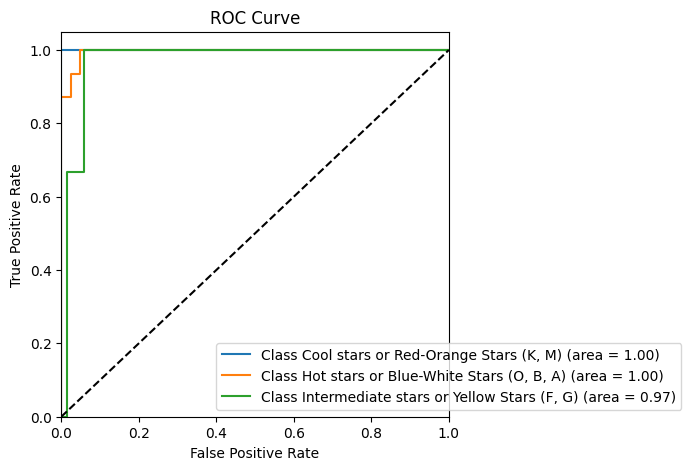

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

##############################################
# ROC Curve
##############################################
y_pred_proba_2 = clf_2.predict_proba(X_test_scaled_2)
fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
for i in range(len(clf_2.classes_)):
    fpr_2[i], tpr_2[i], threadholds_2 = roc_curve(y_test_2 == clf_2.classes_[i], y_pred_proba_2[:, i])
    roc_auc_2[i] = roc_auc_score(y_test_2 == clf_2.classes_[i], y_pred_proba_2[:, i])

for i in range(len(clf_2.classes_)):
    axs.plot(fpr_2[i], tpr_2[i], label=f'Class {clf_2.classes_[i]} (area = {roc_auc_2[i]:.2f})')

axs.plot([0, 1], [0, 1], 'k--')
axs.set_xlim([0.0, 1.0])
axs.set_ylim([0.0, 1.05])
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.set_title('ROC Curve')
axs.legend(loc="lower center", bbox_to_anchor=(1, 0))
plt.show()

5.9 experiment 2 confusion matrix

Confusion Matrix：
 [[38  0  0]
 [ 1 30  0]
 [ 1  2  0]]


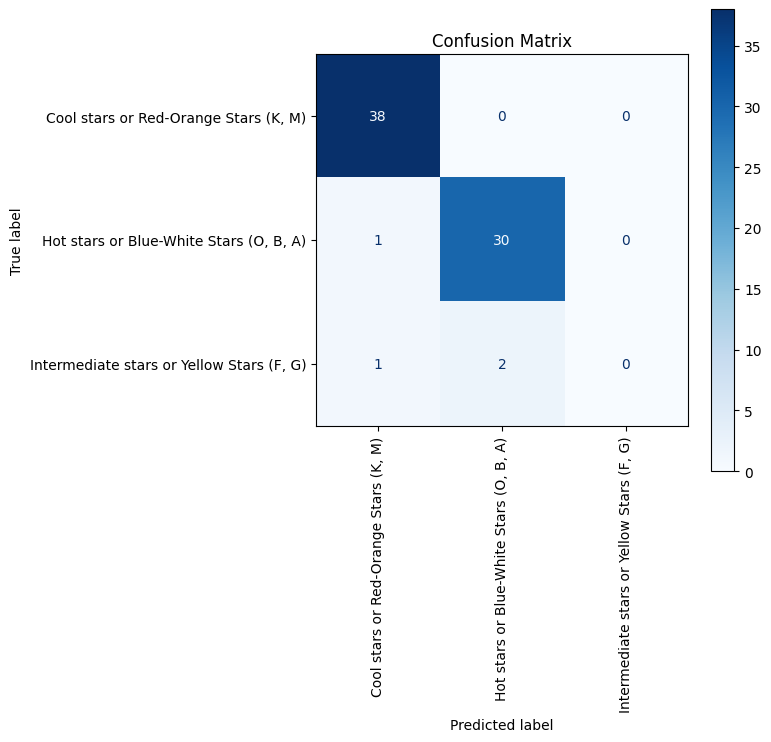

In [ ]:
# confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print("Confusion Matrix：\n", cm_2)


fig, ax = plt.subplots(figsize=(6, 6))
# plot confusion mtrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=clf_2.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title("Confusion Matrix")

plt.show()